In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries
import qiskit as q
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account(

# Unitary gate contruction in Qiskit

## Qiskit uses right indexing
Part of qiskit's internal structure means that bit strings are always right indexed, that means $| q_3, q_2, q_1, q_0 \rangle$ is representing the state of qubit 0 to qubit 3 from right to left.

e.g. $|0010\rangle$ means qubit 1 has been flipped

Now that we've got the hang of doing things by hand, let's do it in python!
To perform the tensor product of $a$ and $b$ in python we use `np.kron(a,b)`. Kron is short for the Kronecker product, and advanced maths notation aside they will do the same matrix operation that we need.

[Find out more](https://numpy.org/doc/stable/reference/generated/numpy.kron.html)
### a) Using  `np.kron(a,b)` print the matrix representing the follwoing:
$$
    |\Psi \rangle = 
    \left(\left(\begin{bmatrix}
        1 \\
        0
     \end{bmatrix}
     \otimes
      \begin{bmatrix}
        1 \\
        0
     \end{bmatrix}\right)
     \otimes
      \begin{bmatrix}
        0 \\
        1
     \end{bmatrix}\right)
     \otimes
      \begin{bmatrix}
        1 \\
        0
     \end{bmatrix}
$$


### b) Using these matrix definitions of the CNOT gate and the Identity matrix
$$
    CNOT = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
     \end{bmatrix}
$$

$$
    I = 
    \begin{bmatrix}
        1 & 0\\
        0 & 1
     \end{bmatrix}
$$

###  and  `np.kron(a,b)` print the matrix representing the follwoing:

$$
    U = (I \otimes I) \otimes CNOT
$$

###  c) Lastly, using `np.dot(a,b)` find the statevector of $|\Phi\rangle$:

$$
    |\Phi\rangle = U |\Psi\rangle
$$
Now that we have created our custom 4 qubit U gate we can pop it into qiskit and simulate!


We need to use two new things:
First we need to use the quantum operator class `q.quantum_info.Operator(U)` this takes a matrix U and makes it a proper operator.
Next we need to make the operator into a gate using `qc.unitary(op, [a,b,c,d], label='U')` this function takes in three variables, `op` which is a quantum operator, `[a,b,c,d]` which is a string containing all the qubits this gate operates over and `label` which gives the gate a name.

In our case we would like our U gate to operate over all 4 qubits:
```
op = q.quantum_info.Operator(U)
qc.unitary(op, [0,1,2,3], label='U')
```


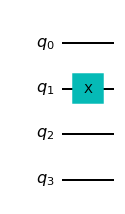

In [5]:
# Statevector simulator use
# This intialises the state 
qc = q.QuantumCircuit(4)
qc.x(1)
display(qc.draw(output="mpl"))

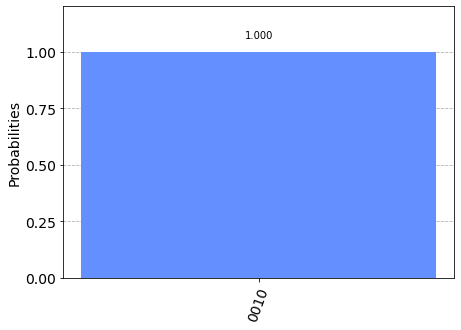

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [6]:
# Show initial state and statevector 
# (rememeber qiskit writes the statevectors and bit strings backwards - right indexed)
backend = q.Aer.get_backend('statevector_simulator')
job = q.execute(qc, backend)
result = job.result()
out_state = result.get_statevector()
counts = result.get_counts(qc)
graph = q.visualization.plot_histogram(counts)
display(graph)
display(out_state)

In [ ]:
op = q.quantum_info.Operator(U)
qc.unitary(op, [0,1,2,3], label='U')
qc = q.QuantumCircuit(4)
qc.op(1)
display(qc.draw(output="mpl"))

# Try making the Operator U using the kron functions using the steps above and run it on a statevector simaultor.

## Noise and Noise Simulation
Unfortunately, quantum computers are not as perfect as our statevector simulator makes it out to be.

In reality the quantum system is subject to random noise which can cause our quantum states to decohere - we can simulate these more realistic quantum systems using the `qasm_simulator`

The `qasm_simulator` works very similarily to the `statevector_simulator` with two main differences:
1. **The execute command requires a third argument `shots` - this tells the simulator how many times you want to run your circuit. (The more times you run the circuit, the closer you can approximate a perfect system.)**

2. **The circuit must also have a measurement gate placed at the end of each qubit rail, this reads out to classical rails represented collectively as C.**

When using `circ.measure(qubit_list, classical_list)` remember that the `qubit_list` is the list of all qubits that are being read out and the `classical_list` is the list of all classic bits that they are being read out to.

Let's use the $\Phi^+$ Bell state as an example:

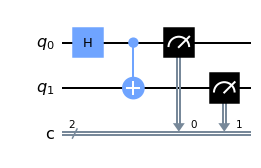

In [12]:
# Initialize a quantum circuit with 2 qubits and 2 classical bits
phi_plus = q.QuantumCircuit(2, 2)
phi_plus.h(0)
phi_plus.cx(0, 1)
phi_plus.measure([0,1], [0,1])
phi_plus.draw(output="mpl")

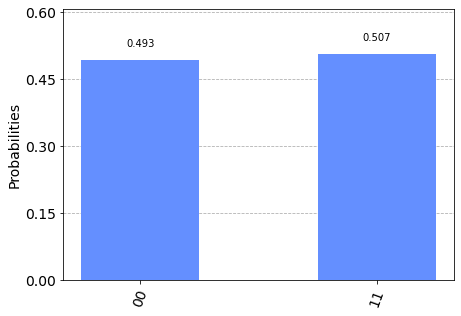

In [15]:
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(phi_plus, simulator, shots=1000) 
# We can now run the circuit through the simulator with 1000 shots, this should give us a good approximation of the ideal quantum state.
result = job.result()
counts = result.get_counts(phi_plus)
q.visualization.plot_histogram(counts)